## CUSTOMER SEGMENTATION

### Dataset
Imagine we own a a supermarket mall and through membership cards, we have some basic idea about the customers who come to shop in the store, such as, Cutomer ID, age, gender, annual income, etc. These are the features in our dataset. Apart from these features, we can define our own features such as Spending Score which is calculated for each customer based on their purchasing data.

### Problem Statement 
What we want to do is to try and identify potential "Target customers" who are more likely to shop in bulk and frequent the mall more often than the rest, thereby helping the marketing team to plan and strategize accordingly. 


## IMPORTING THE LIBRARIES 

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

## LOADING THE DATASET

In [2]:
df = pd.read_csv('/content/drive/My Drive/ML/Work/Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [3]:
df.shape 

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


As we can see, there are no null values in the dataset.

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


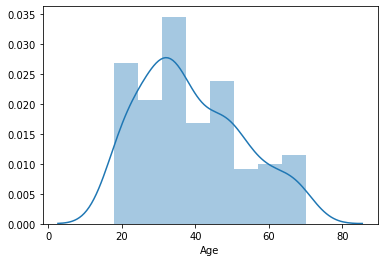

In [14]:
sns.distplot(df['Age'])

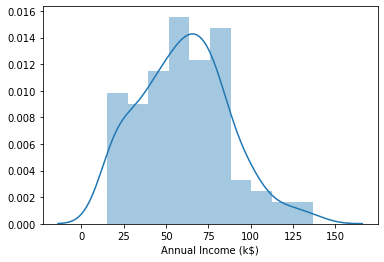

In [15]:
sns.distplot(df['Annual Income (k$)'])

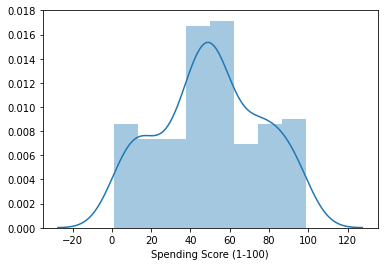

In [16]:
sns.distplot(df['Spending Score (1-100)'])

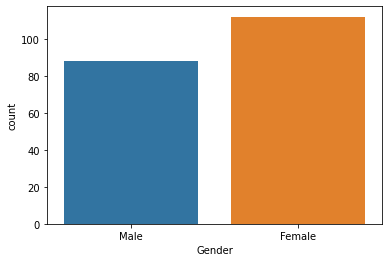

In [17]:
sns.countplot(x='Gender', data=df)

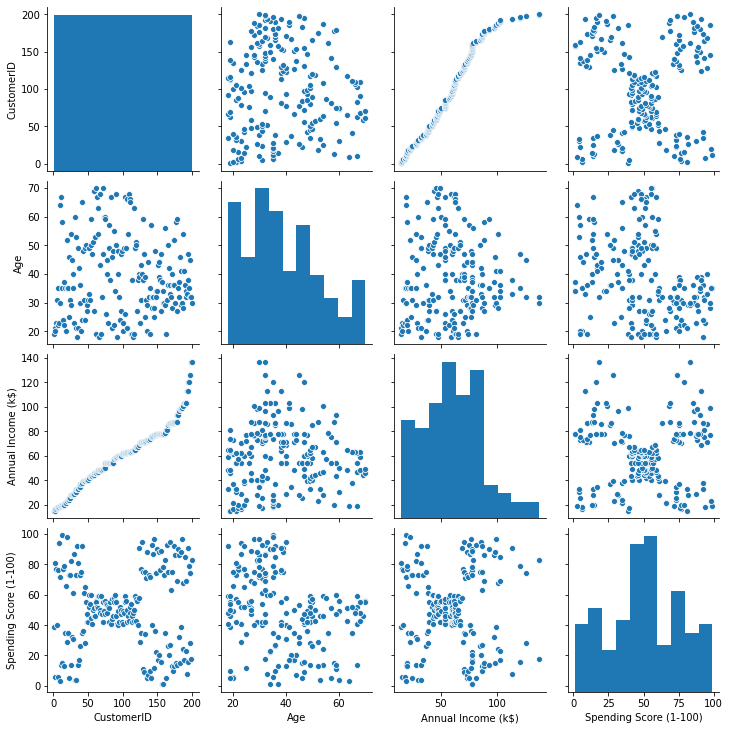

In [24]:
sns.pairplot(df)

## SEGMENTATION/CLUSTERING

### Segmentation using Age and Spending Score

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
X1 = df.iloc[:,[2,4]].values

Text(0, 0.5, 'WCSS')

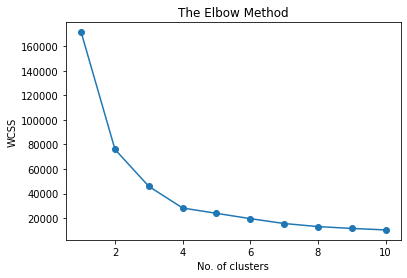

In [38]:
# Using elbow method to decide number of clusters 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'o-')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')


We can see that the elbow occurs at n=4 clusters. Hence we will choose 4 clusters to segment our data.

In [0]:
# Training the K-Means algorithm on the dataset 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X1)

In [42]:
y_kmeans

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

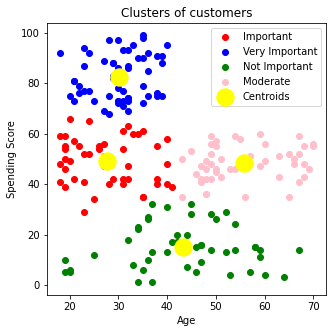

In [55]:
# Visualizing the clusters 

fig = plt.figure(figsize=(5,5))
plt.scatter(X1[y_kmeans==0,0], X1[y_kmeans==0,1], c='red', label='Important')
plt.scatter(X1[y_kmeans==1,0], X1[y_kmeans==1,1], c='blue', label='Very Important')
plt.scatter(X1[y_kmeans==2,0], X1[y_kmeans==2,1], c='green', label='Not Important')
plt.scatter(X1[y_kmeans==3,0], X1[y_kmeans==3,1], c='pink', label='Moderate')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Segmentation using Annual Income and Spending Score

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
X2 = df.iloc[:,[3,4]].values

Text(0, 0.5, 'WCSS')

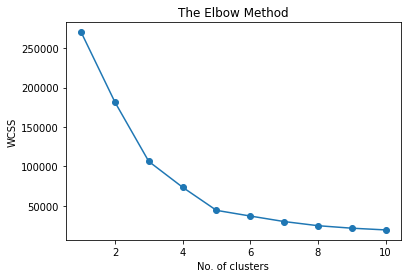

In [58]:
# Using elbow method to decide number of clusters 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'o-')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

We can see that the elbow occurs at n=5 clusters. Hence we will choose 5 clusters to segment our data.

In [0]:
# Training the K-Means algorithm on the dataset 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X2)

In [60]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

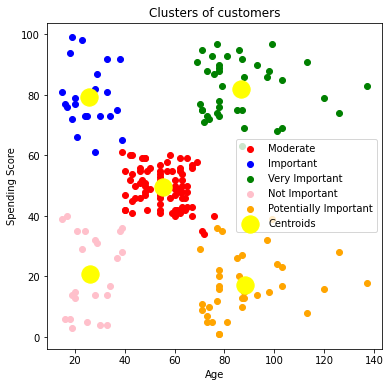

In [63]:
# Visualizing the clusters 

fig = plt.figure(figsize=(6,6))
plt.scatter(X2[y_kmeans==0,0], X2[y_kmeans==0,1], c='red', label='Moderate')
plt.scatter(X2[y_kmeans==1,0], X2[y_kmeans==1,1], c='blue', label='Important')
plt.scatter(X2[y_kmeans==2,0], X2[y_kmeans==2,1], c='green', label='Very Important')
plt.scatter(X2[y_kmeans==3,0], X2[y_kmeans==3,1], c='pink', label='Not Important')
plt.scatter(X2[y_kmeans==4,0], X2[y_kmeans==4,1], c='orange', label='Potentially Important')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Segmentation using Age, Annual Income and Spending Score

In [64]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
X3 = df.iloc[:, [2,3,4]].values

Text(0, 0.5, 'WCSS')

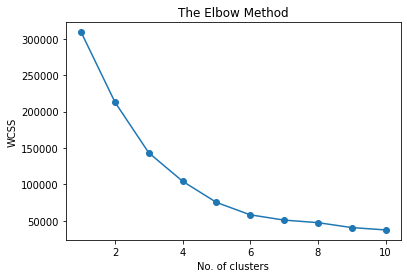

In [66]:
# Using elbow method to decide number of clusters 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'o-')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

We can see that the elbow occurs at n=6 clusters. Hence we will choose 6 clusters to segment our data.

In [0]:
# Training the K-Means algorithm on the dataset 
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X3)

In [68]:
y_kmeans

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 2,
       5, 4, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [73]:
# Visualizing the results 

trace1 = go.Scatter3d(x=df['Age'], y=df['Spending Score (1-100)'], z=df['Annual Income (k$)'], mode='markers',marker=dict(color=y_kmeans, size=20,line=dict(color=y_kmeans,width=12), opacity=0.8))
data = [trace1]
layout=go.Layout(title='Clusters', scene=dict(xaxis=dict(title='Age'),yaxis=dict(title='Spending Score'),zaxis=dict(title='Annual Income')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)